In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
temp = pd.read_pickle('df_of_imdb_data.pkl')

In [4]:
temp['rating'] = temp['rating'].apply(lambda x: x if type(x) == float else np.nan)
temp['runtimes'] = temp['runtimes'].apply(lambda x: int(x[0]) if type(x[0]) == str else np.nan)
temp['metascore'] = temp['metascore'].apply(lambda x: int(x['data']['metascore']) if 'metascore' in x['data'].keys() else np.nan)
temp['year'] = temp['year'].apply(lambda x: x if type(x) == int else 2019) #movie 'outlander' imdb_id 10172802 did not have a year but it is 2019

In [5]:
temp.head()

,imdb_id,titles,year,original_air_date,countries,language,genres,certificates,rating,votes,color_info,runtimes,box_office,producers,directors,production_company,distributors,metascore,is_nominee
0,0388130,Initial D: Third Stage,2001,13 Jan 2001 (Japan),[Japan],"[en, ja, cmn]","[Animation, Action, Romance, Sport]","[Australia:PG, Japan:G, United States:TV-PG]",7.6,1390,[Color],100,[],[2246748],"[1245306, 1564830]","[0179653, 0021660, 0099762, 0113955, 0036168]","[0179653, 0053157, 0039940, 0921883]",NaN,0
1,0273772,Don't Make Trouble!,2001,17 Jan 2001 (France),[France],"[fr, ar]","[Animation, Drama, Comedy]",[France:Tous publics],6.6,49,[Color],70,[],"[1007620, 0099748, 0501590, 0851724]","[0002174, 0071117, 0099379, 0181117, 0216816, ...","[0072738, 0069857]",[0038517],NaN,0
2,0243017,Waking Life,2001,07 Mar 2002 (Australia),[United States],[en],"[Animation, Drama, Fantasy]","[Argentina:13, Australia:M, Brazil:Livre, Cana...",7.7,63692,[Color],99,"{'Opening Weekend United States': '$88,977, 21...","[0438210, 0657921, 0782270, 0806189, 0808819, ...",[0000500],"[0028932, 0046530, 0042682, 0054189, 0123642, ...","[0000756, 0028932, 0007180, 0125154, 0067533, ...",83.0,0
3,0291559,Wave Twisters,2001,[],[United States],[en],"[Animation, Adventure, Musical, Sci-Fi]",[United States:Unrated],7.4,551,[Color],46,[],[1029039],"[1000898, 1037263]",[0060259],[],NaN,0
4,0277909,Mutant Aliens,2001,09 Jan 2002 (France),[United States],[en],"[Animation, Comedy, Sci-Fi]","[France:Tous publics, Germany:16, South Korea:...",6.6,1204,[Color],81,"{'Budget': '$200,000 (estimated)'}","[0390350, 0687739]",[0687739],[0077590],"[0068070, 0112126, 0084806]",39.0,0


In [6]:
# finds films where directors or producers were previously nominated for the best animated film.
# takes a dataframe and category returns a list of 1s and 0s.

def find_prev_nom(df, cat):
    prev_nom = []
    for year in range(2021, 2000, -1):
        films_by_year = df.loc[df['year']==year][::-1]
        previous_nom = df.loc[(df['year'] < year) & (df['is_nominee']==1)][cat].explode()
        set_previous_nom = set(previous_nom)
        for names in films_by_year[cat]:
            
            if set(names).intersection(previous_nom) == set():
                prev_nom.append(0)
            else:
                prev_nom.append(1)
    prev_nom.reverse()
    return prev_nom

In [7]:
prev_nom_prod_encoded = find_prev_nom(temp, 'producers')

In [8]:
prev_nom_dir_encoded = find_prev_nom(temp, 'directors')

In [9]:
def ones_to_text(list_of_prev_nom):
    return ['Previously Nominated' if x ==1 else 'Not Previously Nominated' for x in list_of_prev_nom]

In [10]:
prev_nom_dir = ones_to_text(prev_nom_dir_encoded)
prev_nom_prod = ones_to_text(prev_nom_prod_encoded)

In [11]:
data = {'imdb_id':temp['imdb_id'], 'prev nom dir': prev_nom_dir, 
        'prev nom dir encoded':prev_nom_dir_encoded, 'prev nom prod': prev_nom_prod, 
        'prev nom prod encoded':prev_nom_prod_encoded}

In [12]:
Data = pd.DataFrame(data)

In [13]:
Data.loc[Data['imdb_id']=='0432283']

,imdb_id,prev nom dir,prev nom dir encoded,prev nom prod,prev nom prod encoded
835,0432283,Not Previously Nominated,0,Not Previously Nominated,0


In [14]:
Data.loc[Data['imdb_id']=='5104604']

,imdb_id,prev nom dir,prev nom dir encoded,prev nom prod,prev nom prod encoded
2687,5104604,Previously Nominated,1,Previously Nominated,1


In [15]:
temp = temp.join(Data.set_index('imdb_id'), on='imdb_id')

In [16]:
imdb_train = temp.loc[temp['year']<2018]

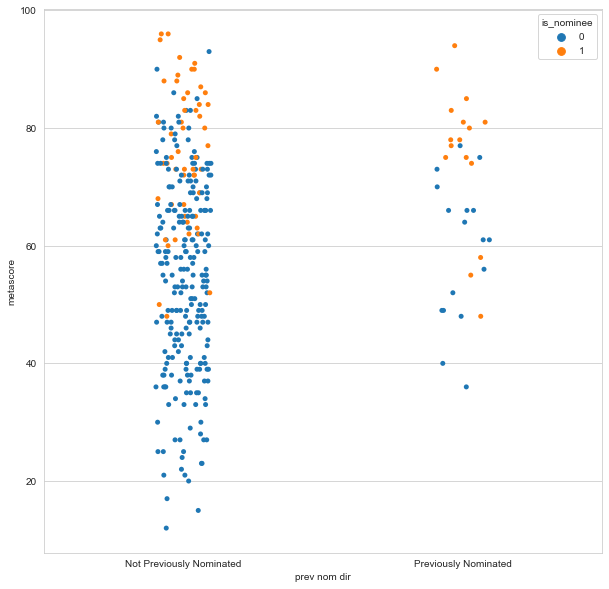

In [17]:
plt.figure(figsize=(10,10))
sns.stripplot(x='prev nom dir', y='metascore', data=imdb_train, hue='is_nominee')
plt.show()

In [18]:
imdb_train['metascore'].mean()

59.255319148936174

In [19]:
imdb_train.loc[imdb_train['prev nom dir encoded']==1]['metascore'].mean()

67.3030303030303

In [20]:
imdb_train.loc[imdb_train['prev nom dir encoded']==0]['metascore'].mean()

58.358108108108105

In [21]:
imdb_train['rating'].mean()

6.161462093862817

In [22]:
imdb_train.loc[imdb_train['prev nom dir encoded']==1]['rating'].mean()

6.745098039215684

In [23]:
imdb_train.loc[imdb_train['prev nom dir encoded']==0]['rating'].mean()

6.147713625866052

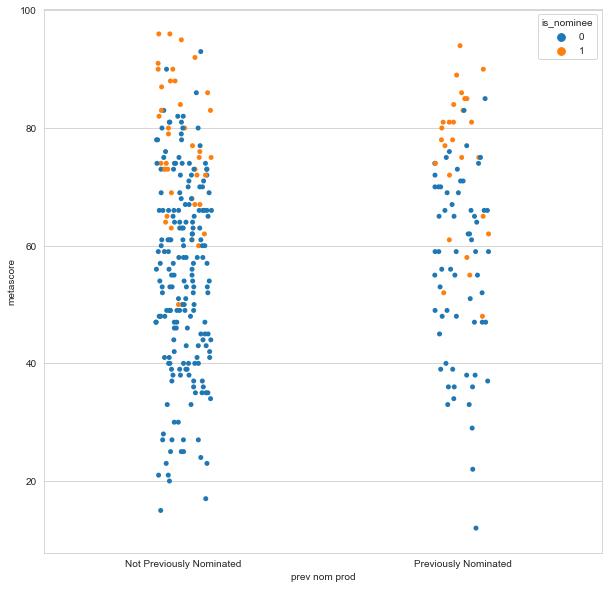

In [24]:
plt.figure(figsize=(10,10))
sns.stripplot(x='prev nom prod', y='metascore', data=imdb_train, hue='is_nominee')
plt.show()

In [25]:
imdb_train.loc[imdb_train['prev nom prod encoded']==1]['metascore'].mean()

61.619565217391305

In [26]:
imdb_train.loc[imdb_train['prev nom prod encoded']==0]['metascore'].mean()

58.33755274261603

In [27]:
imdb_train.loc[imdb_train['prev nom prod encoded']==1]['rating'].mean()

6.382795698924733

In [28]:
imdb_train.loc[imdb_train['prev nom prod encoded']==0]['rating'].mean()

6.141182266009849

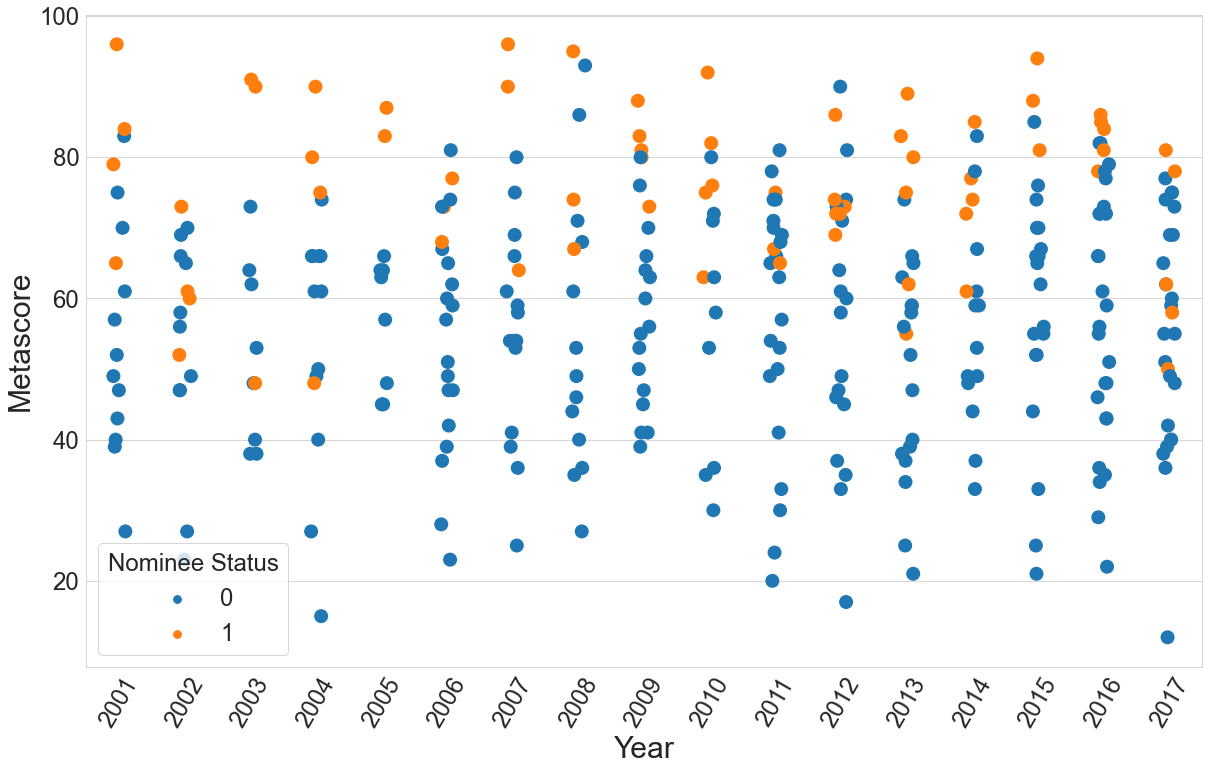

In [84]:
plt.figure(figsize=(20,12))
sns.stripplot(x='year', y='metascore', data=imdb_train, hue='is_nominee', size=14)
plt.legend(title='Nominee Status', loc='lower left')
plt.xlabel('Year', fontsize=30)
plt.xticks(rotation=60)
plt.ylabel('Metascore', fontsize=30)
plt.show()

In [362]:
pd.to_pickle(Data, 'df_previous_nom.pkl')